<a href="https://colab.research.google.com/github/SBiscardi/cd-202202-santiago-biscardi/blob/master/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyproj


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from IPython.core.display import Math
from numpy import mat

In [ ]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)


In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
from datetime import datetime

In [ ]:
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'],format="%d/%m/%Y")

In [ ]:
import pyproj
P=pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
df['x'], df['y']=P(df['longitud'], df['latitud'])
df

In [ ]:
df['x'], df['y'] = P(df['longitud'], df['latitud'])

In [ ]:
lat_alcaldia = 7.06
lon_alcaldia = 73.08
x_alcaldia, y_alcaldia = P(lon_alcaldia, lat_alcaldia)
x_alcaldia, y_alcaldia

(4217603.760073725, 19077136.29452536)

In [ ]:
df['distancia'] = None

In [ ]:
import math
from math import e,pi

In [ ]:
for i in range(df.shape[0]):
  df.loc[i,'distancia'] = math.sqrt(((df['x'][i] - lat_alcaldia)**2) +((df['y'][i] - lon_alcaldia)**2))


In [ ]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object','datetime64'])
datosf = datosf.drop('año',axis=1)
datosf = datosf.drop('cod_pais_o',axis=1)
datosf = datosf.drop('condicion_final',axis=1)
datosf = datosf.drop('fecha_defuncion',axis=1)
datosf = datosf.drop('certif_defuncion',axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb 

colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Pearson Correlation of Feature', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [ ]:
from math import ceil,floor

In [ ]:

def casos(res, ab):
  res = res
  ab = ab
  
  minx = df['x'].min() - ab
  miny = df['y'].min() - ab
  maxx = df['x'].max() + ab
  maxy = df['y'].max() + ab

  len_x = ceil((maxx-minx)/res)
  len_y = ceil((maxy-miny)/res)

  matriz = [[0 for i in range(len_x)] for j in range(len_y)]

  for i in range(df.shape[0]):
    a = floor((df.loc[i, 'y'] - miny)/res)
    b = floor((df.loc[i, 'x'] - minx)/res)

    matriz[a][b] += 1

  return len_x, len_y, matriz



In [ ]:
import numpy as np 
len_x, len_y, matriz = casos(10,100)
M1=np.zeros((len_x,len_y))
print (M1)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


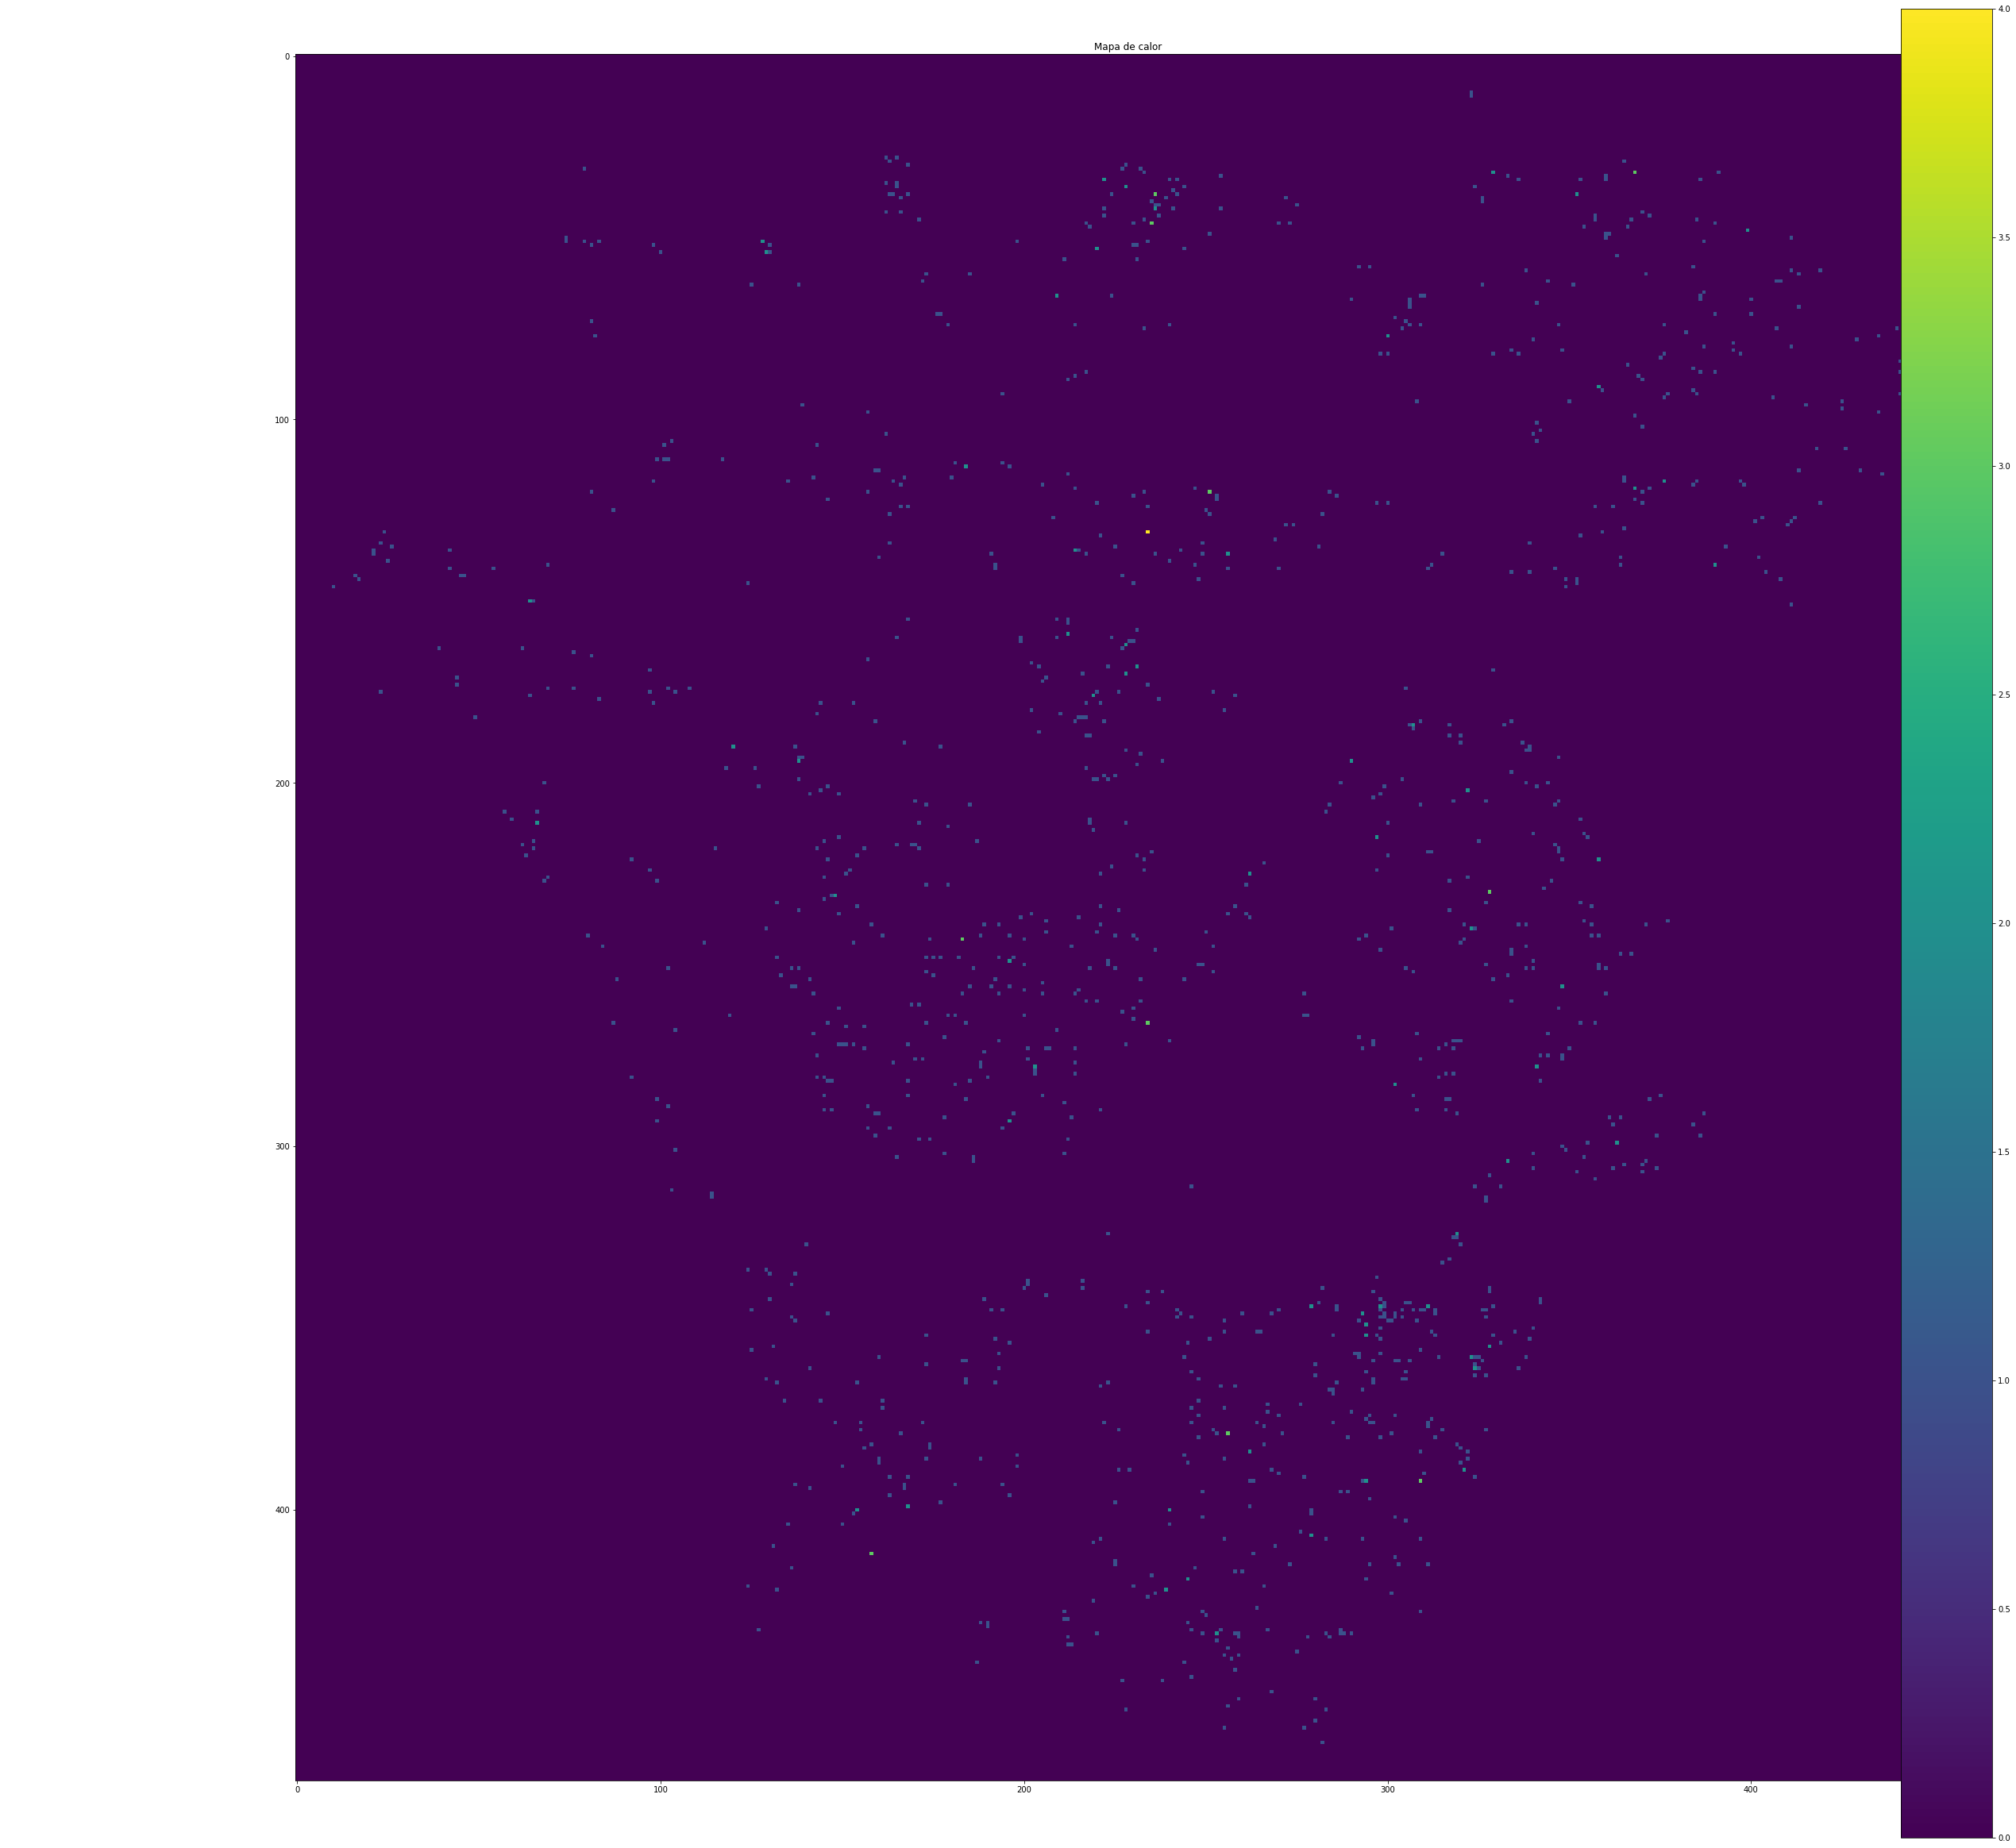

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 40))

ax = fig.add_subplot(111)
ax.set_title('Mapa de calor')
plt.imshow(matriz)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [ ]:
acumulado = [[0 for i in range(len_y)] for j in range(len_x)]

intr = int(ab/res)

for i in range(len(matriz)):
  for j in range(len(matriz[0])):
    if(matriz[i][j] > 0):
      for k in range(i - intr, i + intr):
        for l in range(j - intr, j + intr):
          dist = (np.sqrt((i - k)**2 + (j - l)**2)) * res
          if(dist < ab):
            acumulado[k][l] += matriz[i][j]

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Person Correlation of Feaures', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 40))

ax = fig.add_subplot(111)
ax.set_title('Mapa de calor')
plt.imshow(acumulado)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [ ]:
def triangular(x,ab):
  y = 1-abs(x/ab)
  return y

In [ ]:
from numpy.ma.core import sqrt
def gaussiana(x,ab):
  y = (e**(-(x/ab)**2)/2)/np.sqrt(2*pi)
  return y

In [ ]:
def epanechnikov(x,ab):
  y = 3/4*(1-(ab/x)**2)
  return y

In [ ]:
def varianza_min(x,ab):
  y = 3/8 (3-5(x/ab)**2)
  return y

In [ ]:
def uniforme (x,ab):
  y = 0.5 
  return y

In [ ]:
def paint(matriz):
  fig = plt.figure(figsize=(50, 40))

  ax = fig.add_subplot(111)
  ax.set_title('Mapa de calor')
  plt.imshow(matriz)
  ax.set_aspect('equal')

  cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
  cax.get_xaxis().set_visible(False)
  cax.get_yaxis().set_visible(False)
  cax.patch.set_alpha(0)
  cax.set_frame_on(False)
  plt.colorbar(orientation='vertical')
  plt.show()

In [ ]:
def sumatoria(res, ab, len_x, len_y, matriz):
  acumulado = [[0 for i in range(len_x)] for j in range(len_y)] 

  intr = int(ab/res)

  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      if(matriz[i][j] > 0):
        for k in range(i - intr, i + intr):
          for l in range(j - intr, j + intr):
            dist = (sqrt((i - k)**2 + (j - l)**2)) * res
            if(dist < ab):
              acumulado[k][l] += matriz[i][j]
  
  return acumulado

In [ ]:
def density(ab, len_x, len_y, matriz, funcion):
  densidad = [[0 for i in range(len_x)] for j in range(len_y)]

  if(funcion == 1):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += uniforme()
  elif(funcion == 2):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += triangular(matriz[i][j], ab)
  elif(funcion == 3):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += gaussiana(matriz[i][j], ab)
  elif(funcion == 4):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += epanechnikov(matriz[i][j], ab)
  elif(funcion == 5):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += varianza_min(matriz[i][j], ab)
  else:
    print("Opción Inválida")
    return 0

  return densidad

In [ ]:
!pip install cython
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 13.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 49.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 48.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 51.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 60.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |███████████████████

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely